# Распознавание цифр, нарисованных в графическом редакторе

**Распознайте рукописную цифру, созданную вами с помощью графического редактора (например, Paint).**

Последовательность шагов:

1. В графическом редакторе рисуем произвольную цифру.

2. Сохраняем документ и загружаем его в Colaboratory.

3. С помощью функции image.load_img(path, target_size=(28, 28), color_mode = ‘grayscale’) загружаем картинку в переменную.

4. С помощью функции image.img_to_array(img) преобразуем изображение в numpy-массив.

5. Выполняем инверсию цветов, нормирование и решейп массива.

6. Выполняем распознавание собственной рукописной цифры.

In [1]:
from pathlib import Path
import re
import tempfile

import gdown
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.preprocessing import image

from matplotlib import pyplot as plt
%matplotlib inline

Определить каталог для загрузки изображений.

In [2]:
IMG_PATH = Path.cwd().parent.parent / 'data' / 'images' / '01-mnist'

Определить URL для загрузки весов предобученной нейронной сети.

In [3]:
WEIGHTS_URL = "https://drive.google.com/uc?export=download&id=1UMH1zOqscXugDnoW-gs3tcDQY9nPZwV4"

## Создание нейронной сети

In [4]:
model = Sequential()
model.add(
    Dense(
        800,
        input_dim=28*28,
        activation='relu'
    )
)
model.add(
    Dense(
        400,
        activation='relu'
    )
)
model.add(
    Dense(
        10,
        activation='softmax'
    )
)

Скачать веса нейронной сети с Google Диск.

In [5]:
weights_path = Path(tempfile.gettempdir()) / 'aiu-01-mnist-ultra-light-model.h5'
gdown.cached_download(WEIGHTS_URL, path=weights_path, quiet=False);

File exists: C:\Users\divos\AppData\Local\Temp\aiu-01-mnist-ultra-light-model.h5


Загрузить веса нейронной сети.

In [6]:
model.load_weights(weights_path)

## Распознавание цифр на изображениях

### Распознавание цифр, созданных от руки в графическом редакторе

Загрузить написанные от руки в графическом редакторе цифры.

In [7]:
images_org = []
for path in IMG_PATH.iterdir():
    match = re.match(r'^.*(\d).png$', str(path))
    if match:
        images_org.append(
            (
                int(match[1]),
                image.load_img(path, target_size=(28, 28), color_mode='grayscale'),
            )
        )

images_org.sort(key=lambda item: item[0])

Отобразить загруженные изображения.

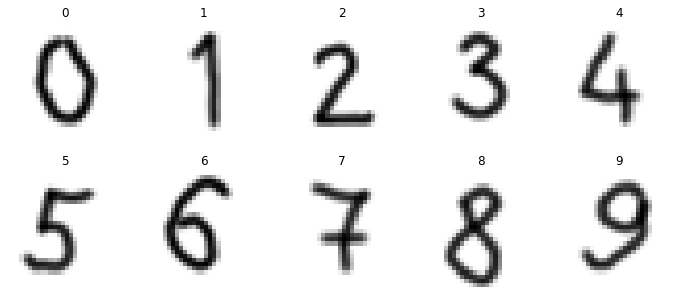

In [8]:
_, axes = plt.subplots(2, 5, figsize=(12, 5))
axes = axes.flatten()

for idx, (image_org, ax) in enumerate(zip(images_org, axes)):
    ax.imshow(image_org[1], cmap='gray')

    ax.set_title(str(idx))
    ax.set_axis_off()

plt.show();

Выполнить инверсию цветов и нормирование. Индекс элемента в списке `digits` соответствует распознаваемой цифре.

In [9]:
digits = []
for _, img in images_org:
    digit = image.img_to_array(img)
    digits.append(np.clip(1. - digit / digit.max(), 0., 1.))

Отобразить результаты инверсии цветов и нормирования.

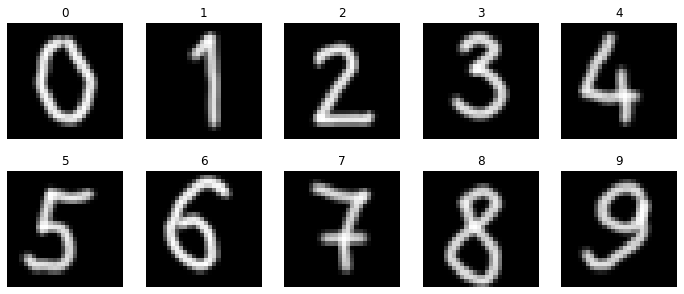

In [10]:
_, axes = plt.subplots(2, 5, figsize=(12, 5))
axes = axes.flatten()

for idx, (digit, ax) in enumerate(zip(digits, axes)):
    ax.imshow(digit, cmap='gray')

    ax.set_title(str(idx))
    ax.set_axis_off()

plt.show();

Изменить размер массивов и подготовить данные для распознавания.

In [11]:
data = np.array([digit.flatten() for digit in digits])

print(data.shape)

(10, 784)


Выполнить распознавание данных нейронной сетью.

In [12]:
predicted = np.argmax(model.predict(data, verbose=True), axis=0)

1/1 [==============================] - 0s 2ms/step


Отобразить результаты распознавания. Так как индекс в списке соответствует распознаваемой цифре, то будем сравнивать индексы элементов с их значениями.

In [13]:
count = 0

for idx, value in enumerate(predicted):
    if idx == value:
        fmt = "Требуется: {}, предсказано: {}"
        count += 1
    else:
        fmt = "Требуется: {}, предсказано: {}, несовпадение!"

    print(fmt.format(idx, value))

print(f"\nAccuracy: {count / len(predicted)}")

Требуется: 0, предсказано: 0
Требуется: 1, предсказано: 1
Требуется: 2, предсказано: 2
Требуется: 3, предсказано: 3
Требуется: 4, предсказано: 4
Требуется: 5, предсказано: 5
Требуется: 6, предсказано: 4, несовпадение!
Требуется: 7, предсказано: 7
Требуется: 8, предсказано: 8
Требуется: 9, предсказано: 9

Accuracy: 0.9


### Распознавание цифр, созданных с использованием текса в графическом редакторе

Загрузить созданные с использованием текста (шрифт: гарнитура Calibri, кегль 20) в графическом редакторе цифры.

In [14]:
images_org.clear()
for path in IMG_PATH.iterdir():
    match = re.match(r'^.*(\d)f.png$', str(path))
    if match:
        images_org.append(
            (
                int(match[1]),
                image.load_img(path, target_size=(28, 28), color_mode='grayscale'),
            )
        )

images_org.sort(key=lambda item: item[0])

Отобразить загруженные изображения.

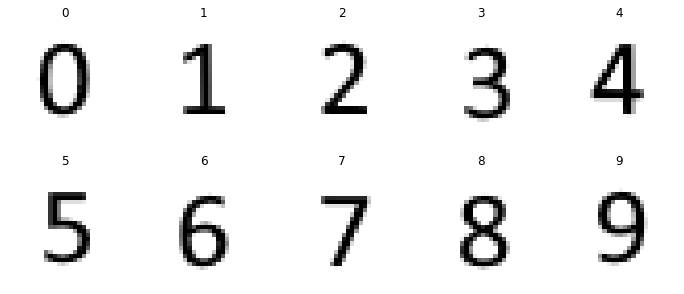

In [15]:
_, axes = plt.subplots(2, 5, figsize=(12, 5))
axes = axes.flatten()

for idx, (image_org, ax) in enumerate(zip(images_org, axes)):
    ax.imshow(image_org[1], cmap='gray')

    ax.set_title(str(idx))
    ax.set_axis_off()

plt.show();

Выполнить инверсию цветов и нормирование. Индекс элемента в списке `digits` соответствует распознаваемой цифре.

In [16]:
digits.clear()
for _, img in images_org:
    digit = image.img_to_array(img)
    digits.append(np.clip(1. - digit / digit.max(), 0., 1.))

Отобразить результаты инверсии цветов и нормирования.

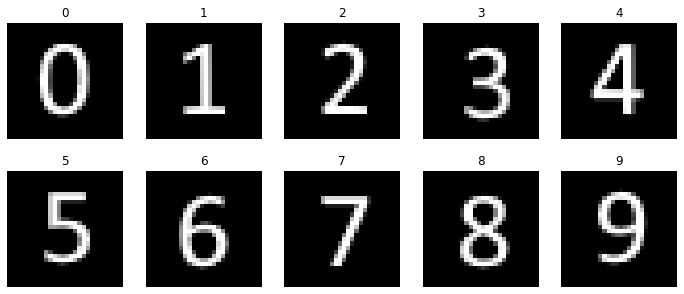

In [17]:
_, axes = plt.subplots(2, 5, figsize=(12, 5))
axes = axes.flatten()

for idx, (digit, ax) in enumerate(zip(digits, axes)):
    ax.imshow(digit, cmap='gray')

    ax.set_title(str(idx))
    ax.set_axis_off()

plt.show();

Изменить размер массивов и подготовить данные для распознавания.

In [18]:
data = np.array([digit.flatten() for digit in digits])

print(data.shape)

(10, 784)


Выполнить распознавание данных нейронной сетью.

In [19]:
predicted = np.argmax(model.predict(data, verbose=True), axis=0)

1/1 [==============================] - 0s 3ms/step


Отобразить результаты распознавания. Так как индекс в списке соответствует распознаваемой цифре, то будем сравнивать индексы элементов с их значениями.

In [20]:
count = 0

for idx, value in enumerate(predicted):
    if idx == value:
        fmt = "Требуется: {}, предсказано: {}"
        count += 1
    else:
        fmt = "Требуется: {}, предсказано: {}, несовпадение!"

    print(fmt.format(idx, value))

print(f"\nAccuracy: {count / len(predicted)}")

Требуется: 0, предсказано: 0
Требуется: 1, предсказано: 1
Требуется: 2, предсказано: 2
Требуется: 3, предсказано: 3
Требуется: 4, предсказано: 4
Требуется: 5, предсказано: 5
Требуется: 6, предсказано: 6
Требуется: 7, предсказано: 7
Требуется: 8, предсказано: 8
Требуется: 9, предсказано: 9

Accuracy: 1.0
